# STFT via Binning

In [113]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from IPython import display

%matplotlib inline

## Load Audio

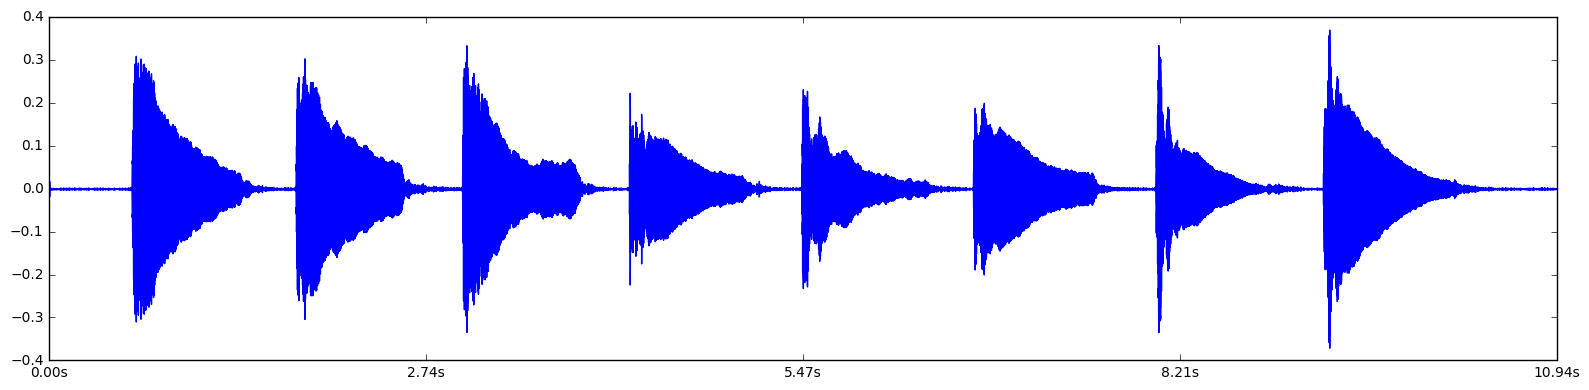

In [114]:
x, fs = librosa.load('../data/Scale_Cmajor_Piano.wav')
plt.figure(figsize=(16, 4))
librosa.display.waveplot(x, sr=fs)
plt.tight_layout()
plt.show()

In [115]:
display.Audio(data=x, rate=fs)

## Compute STFT

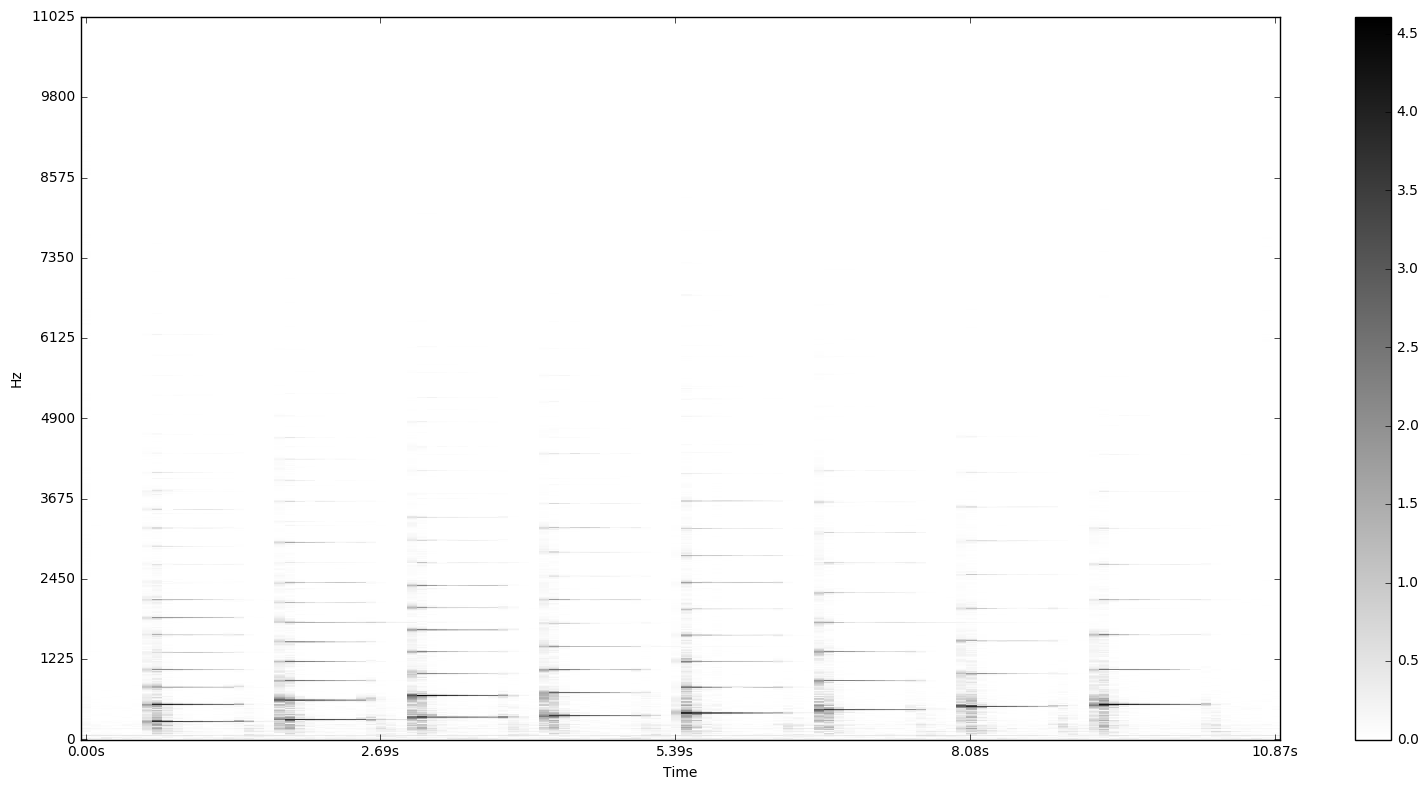

In [116]:
n_fft = 4096
hop_size = 2048
X_stft = librosa.stft(x, hop_length=hop_size, n_fft=n_fft)
X_stft_comp = np.log(1 + 0.5 * np.abs(X_stft))
plt.figure(figsize=(16, 8))
librosa.display.specshow(X_stft_comp, x_axis='time', y_axis='linear', cmap='gray_r', n_yticks=10, hop_length=hop_size)
plt.colorbar()
plt.tight_layout()
plt.show()

## Log-Frequency STFT

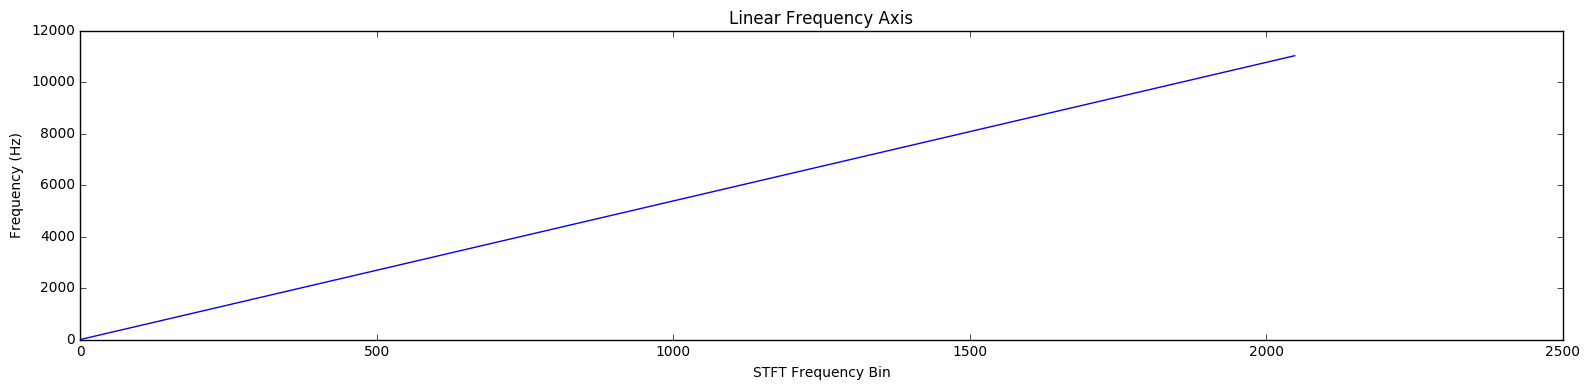

In [117]:
ax_freq_lin = librosa.fft_frequencies(sr=fs, n_fft=n_fft)
ax_freq_lin = np.arange(X_stft.shape[0]) * fs / n_fft

plt.figure(figsize=(16, 4))
plt.plot(ax_freq_lin)
plt.title('Linear Frequency Axis')
plt.xlabel('STFT Frequency Bin')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()

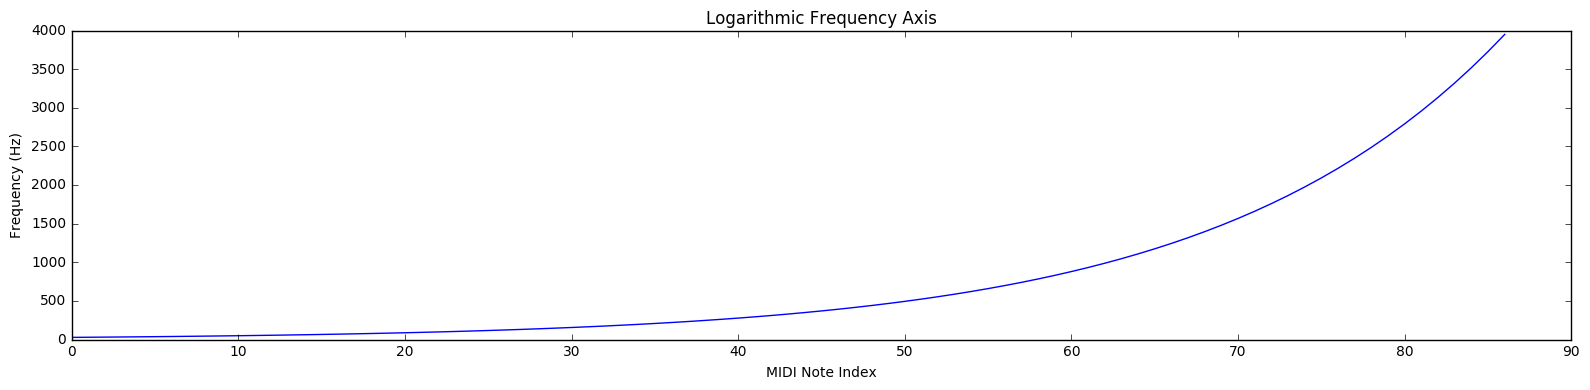

In [118]:
pitches = np.arange(21, 108)
ax_freq_log = librosa.midi_to_hz(pitches)

plt.figure(figsize=(16, 4))
plt.plot(ax_freq_log)
plt.title('Logarithmic Frequency Axis')
plt.xlabel('MIDI Note Index')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()

Now, we define for each pitch $p \in [0:127]$ the set

$P(p) := \{k\in[0:K]:F(p - 0.5) \leq   F_k <  F(p + 0.5)\}$,

given the pitch center frequency $F(p) = 2^{(p-69)/12} \cdot 440$.

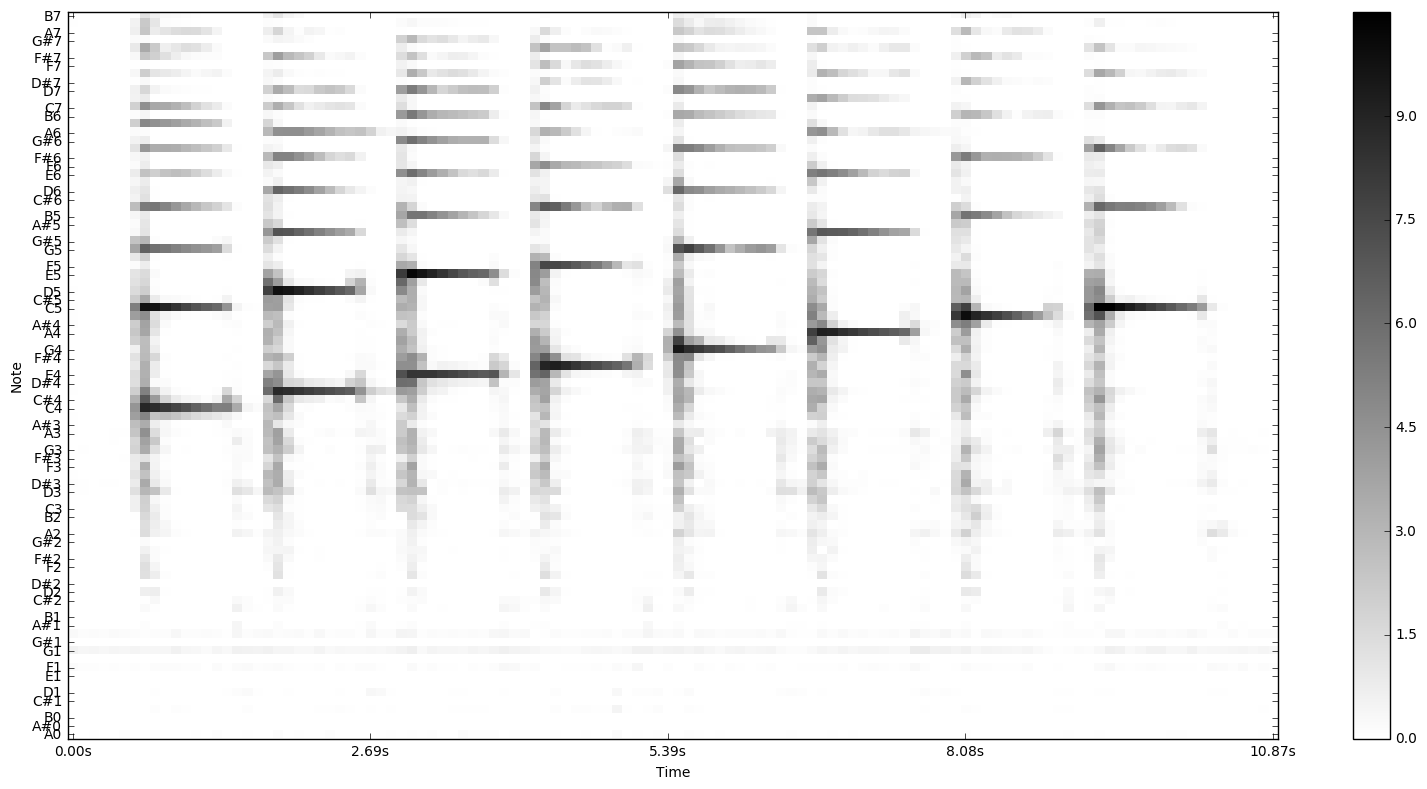

In [122]:
def center_freq(p, A4_tuning=440.0):
    return A4_tuning * 2**((p - 69) / 12)

X_stft_log = np.zeros((len(pitches), X_stft.shape[1]))

for cur_pitch in pitches:
    f_lower_bound =  center_freq(cur_pitch - 0.5)
    f_upper_bound =  center_freq(cur_pitch + 0.5)

    cur_idxs = np.where((ax_freq_lin >= f_lower_bound) & (ax_freq_lin < f_upper_bound))
    X_stft_log[cur_pitch - pitches[0]] = np.sum(np.abs(X_stft[cur_idxs])**2, axis=0)

plt.figure(figsize=(16, 8))
librosa.display.specshow(np.log(1 + 0.5 * X_stft_log), x_axis='time', y_axis='cqt_note',
                         cmap='gray_r', n_yticks=60, hop_length=hop_size, fmin=librosa.midi_to_hz(pitches[0]))
plt.colorbar()
plt.tight_layout()
plt.show()